In [1]:
import pandas as pd

csv_path = "C:\\TFM\\DFinal.csv"
df = pd.read_csv(csv_path, sep=";", dtype={"Tiempo_Medio_Estancia": float, "Gasto_Medio_Diario_PorVisitante": float}, decimal=",")

Resumen de Estadísticas Descriptivas

In [53]:
# Estadísticas descriptivas básicas para columnas numéricas
df.describe()

,Anyo,Mes,Tiempo_Medio_Estancia,Gasto_Medio_Diario_PorVisitante,Total_Turistas,Total_Pernoctaciones
count,49682.000000,49682.000000,49682.000000,49682.000000,49682.000000,4.968200e+04
mean,2020.704018,7.055936,8.596451,80.264716,3311.259551,2.647966e+04
std,1.071230,3.405623,3.159356,28.580361,17131.830553,1.236742e+05
min,2019.000000,1.000000,1.200000,16.970000,30.000000,6.900000e+01
25%,2020.000000,4.000000,6.400000,62.030000,119.000000,9.100000e+02
50%,2021.000000,7.000000,8.100000,75.240000,404.000000,3.283000e+03
75%,2022.000000,10.000000,10.100000,92.690000,1641.000000,1.439475e+04
max,2022.000000,12.000000,40.300000,392.050000,726067.000000,5.300289e+06


Distribuciones de Frecuencia

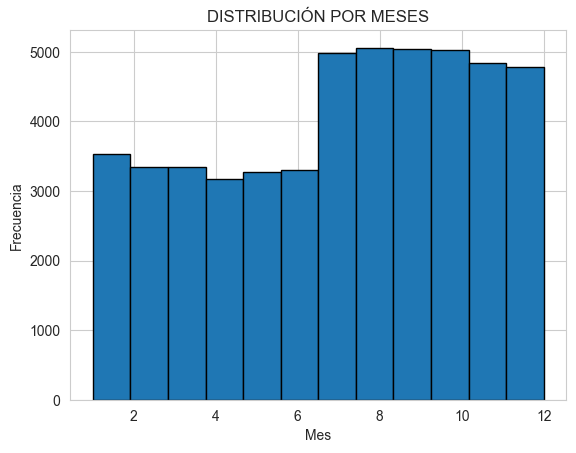

In [4]:
import matplotlib.pyplot as plt

# Histograma del mes
plt.hist(df['Mes'], bins=12, edgecolor='k')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('DISTRIBUCIÓN POR MESES')
plt.show()


Agrupación y Agregación

In [44]:
# Agrupación por continente de origen y cálculo del promedio del gasto diario
promedio_gasto = df.groupby('Origen')['Gasto_Medio_Diario_PorVisitante'].mean()
promedio_estancia = df.groupby('Destino_Provincia')['Tiempo_Medio_Estancia'].mean()
print(promedio_gasto)
print(promedio_estancia)

Origen
Alemania                     11.871278
Andorra                       7.019435
Arabia Saudí                  7.338150
Argentina                     9.269490
Australia                     8.109353
Austria                       9.805005
Brasil                        8.805629
Bélgica                       8.262669
Canadá                        6.542923
Chile                         8.018085
China                         7.747337
Colombia                     10.712378
Corea                         6.083836
Dinamarca                    10.396981
Emiratos Árabes Unidos        6.691704
Estados Unidos de América    10.551938
Filipinas                     4.825214
Finlandia                     8.038716
Francia                       9.578242
India                         6.332757
Irlanda                       8.327690
Israel                        6.568369
Italia                        7.842311
Japón                         8.773706
México                        8.775513
Noruega           

Análisis de Tendencias Temporales

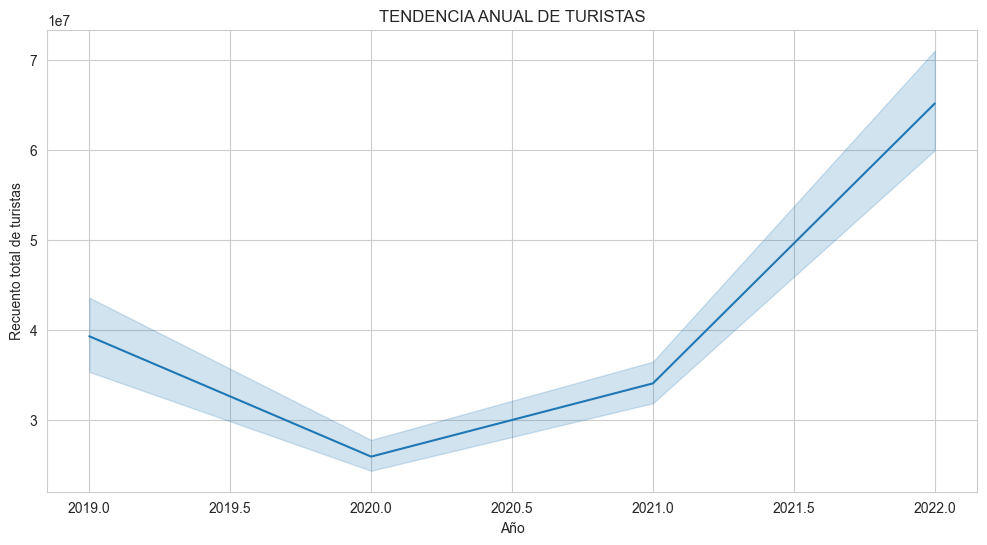

In [5]:
# Gráfico de línea de recuento total de turistas por año
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Anyo', y='Total_Turistas', estimator='sum')
plt.title('TENDENCIA ANUAL DE TURISTAS')
plt.xlabel('Año')
plt.ylabel('Recuento total de turistas')
plt.show()


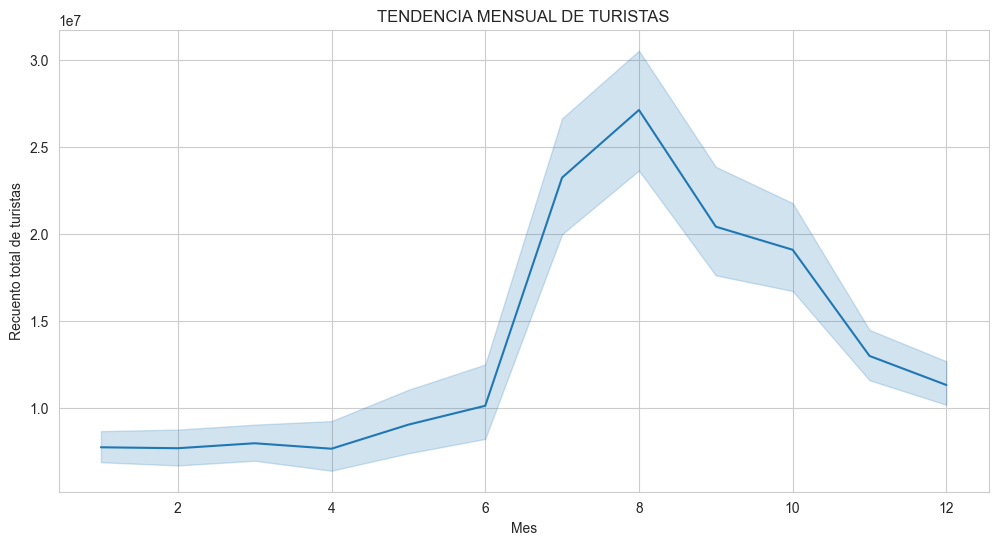

In [6]:
# Gráfico de línea de recuento total de turistas por mes
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Mes', y='Total_Turistas', estimator='sum')
plt.title('TENDENCIA MENSUAL DE TURISTAS')
plt.xlabel('Mes')
plt.ylabel('Recuento total de turistas')
plt.show()

Análisis de Correlación

In [57]:
# Matriz de correlación
df_numeric = df.select_dtypes(include=['number'])
correlacion = df_numeric.corr()
correlacion

,Anyo,Mes,Tiempo_Medio_Estancia,Gasto_Medio_Diario_PorVisitante,Total_Turistas,Total_Pernoctaciones
Anyo,1.000000,-0.198522,-0.144754,0.090958,0.010104,0.003435
Mes,-0.198522,1.000000,-0.016407,0.024647,0.019511,0.019975
Tiempo_Medio_Estancia,-0.144754,-0.016407,1.000000,-0.123669,-0.036683,0.012474
Gasto_Medio_Diario_PorVisitante,0.090958,0.024647,-0.123669,1.000000,-0.013683,-0.024562
Total_Turistas,0.010104,0.019511,-0.036683,-0.013683,1.000000,0.982972
Total_Pernoctaciones,0.003435,0.019975,0.012474,-0.024562,0.982972,1.000000


Análisis por Categorías

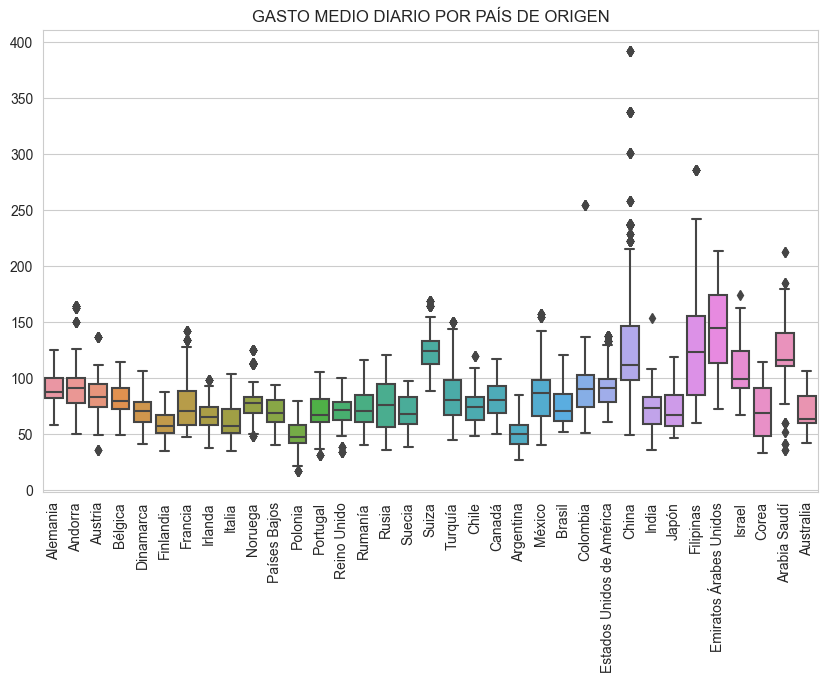

In [7]:
# Boxplot del gasto medio diario por pais de origen
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Origen', y='Gasto_Medio_Diario_PorVisitante')
plt.xticks(rotation=90)
plt.title('GASTO MEDIO DIARIO POR PAÍS DE ORIGEN')
plt.xlabel('')
plt.ylabel('')
plt.show()


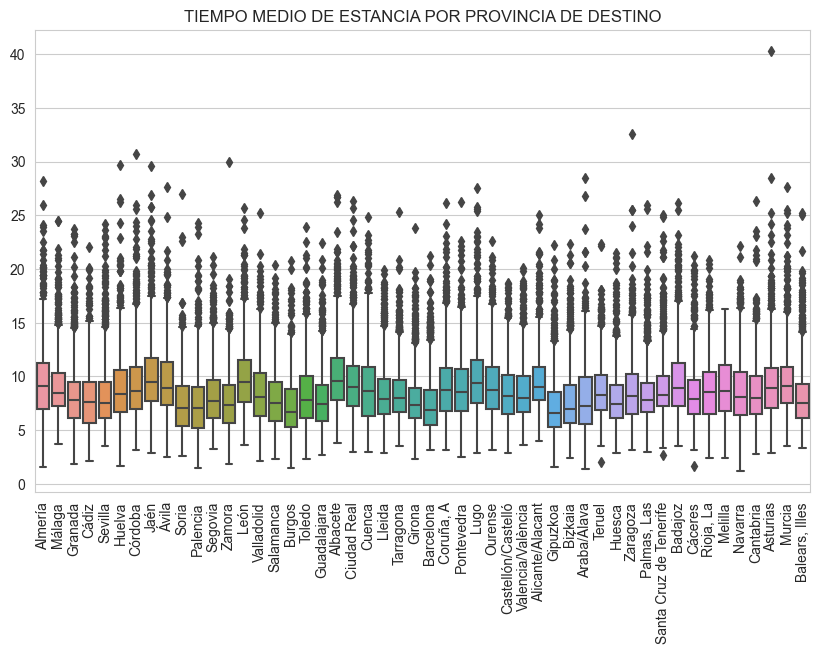

In [8]:
# Boxplot del tiempo medio de estancia por provincia de destino
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Destino_Provincia', y='Tiempo_Medio_Estancia')
plt.xticks(rotation=90)
plt.title('TIEMPO MEDIO DE ESTANCIA POR PROVINCIA DE DESTINO')
plt.xlabel('')
plt.ylabel('')
plt.show()

Regresión

In [18]:
import statsmodels.api as sm

X = df[['Mes']]
X = sm.add_constant(X)
y = df['Gasto_Medio_Diario_PorVisitante']

modelo = sm.OLS(y, X).fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Gasto_Medio_Diario_PorVisitante   R-squared:                       0.001
Model:                                         OLS   Adj. R-squared:                  0.001
Method:                              Least Squares   F-statistic:                     30.20
Date:                             Thu, 07 Sep 2023   Prob (F-statistic):           3.92e-08
Time:                                     19:46:40   Log-Likelihood:            -2.3705e+05
No. Observations:                            49682   AIC:                         4.741e+05
Df Residuals:                                49680   BIC:                         4.741e+05
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.8052      0.295    267.226      0.000      78.227      79.383
Mes            0.2068      0.038      5.495      0.000       0.133       0.281
==============================================================================
Omnibus:                    25858.774   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           323841.199
Skew:                           2.222   Prob(JB):                         0.00
Kurtosis:                      14.691   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pruebas Estadísticas

In [87]:
from scipy.stats import f_oneway

continente_1 = df[df['Origen_Continente'] == 'Europa']['Gasto_Medio_Diario_PorVisitante']
continente_2 = df[df['Origen_Continente'] == 'Asia']['Gasto_Medio_Diario_PorVisitante']

f_statistic, p_value = f_oneway(continente_1, continente_2)

print(f_statistic)
print(p_value)

7417.085559015309
0.0


Gráfico de Distribución de Datos (Histograma o Gráfico de Barras)

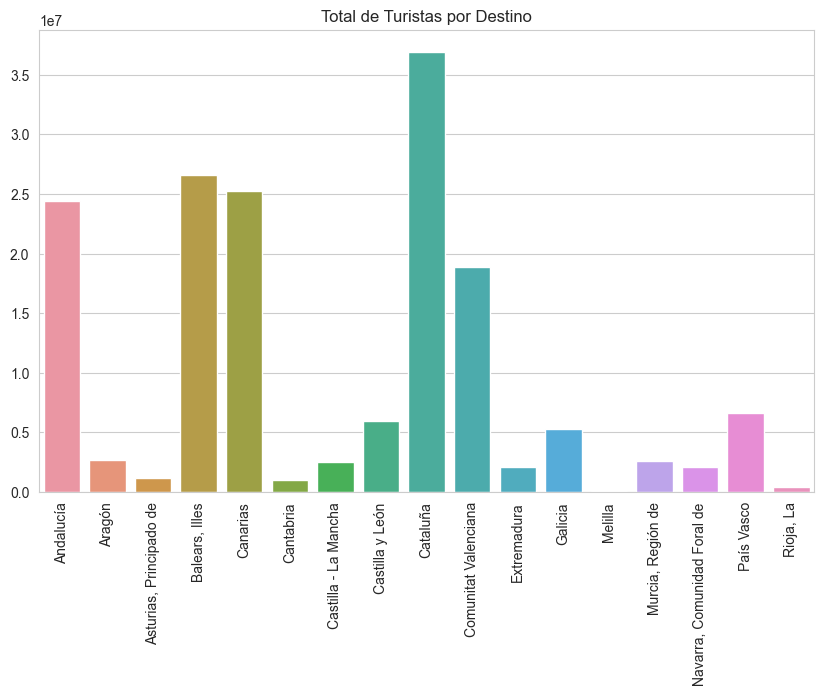

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el total de turistas por destino
total_turistas_por_destino = df.groupby('Destino')['Total_Turistas'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=total_turistas_por_destino, x='Destino', y='Total_Turistas')
plt.xlabel('')
plt.ylabel('')
plt.title('Total de Turistas por Destino')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()



Gráfico de Dispersión

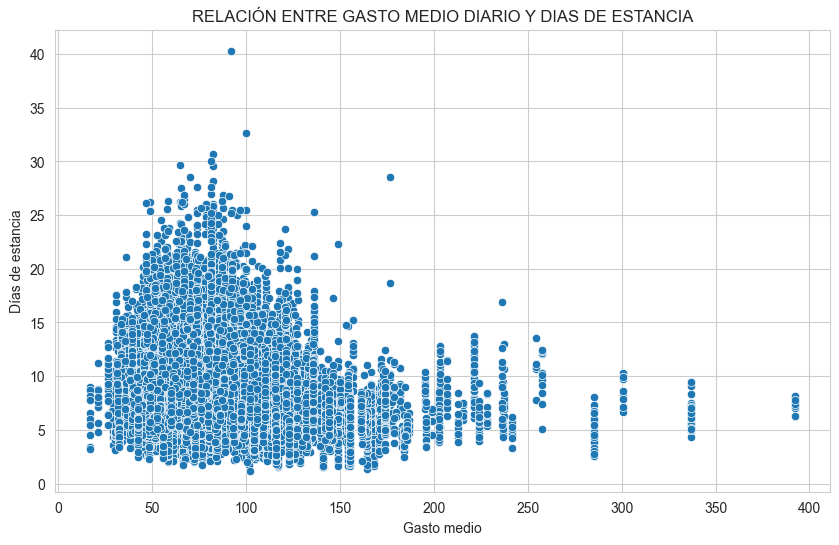

In [84]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gasto_Medio_Diario_PorVisitante', y='Tiempo_Medio_Estancia')
plt.xlabel('Gasto medio')
plt.ylabel('Días de estancia')
plt.title('RELACIÓN ENTRE GASTO MEDIO DIARIO Y DIAS DE ESTANCIA')
plt.show()
